In [1]:
# Import des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Import des données
df = pd.read_csv('Data\DecathlonData.txt', sep='\t')
df.head()

,centm,Longjump,Shotput,Highjump,quatrecentm,centdixhurdle,Discus,Polevault,Javeline,mille500m,Rank,Points,Competition
SEBRLE,"11,04","7,58","14,83","2,07","49,81","14,69","43,75","5,02","63,19","291,7",1,8217,Decastar
CLAY,"10,76","7,4","14,26","1,86","49,37","14,05","50,72","4,92","60,15","301,5",2,8122,Decastar
KARPOV,"11,02","7,3","14,77","2,04","48,37","14,09","48,95","4,92","50,31","300,2",3,8099,Decastar
BERNARD,"11,02","7,23","14,25","1,92","48,93","14,99","40,87","5,32","62,77","280,1",4,8067,Decastar
YURKOV,"11,34","7,09","15,19","2,1","50,42","15,31","46,26","4,72","63,44","276,4",5,8036,Decastar


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, SEBRLE to Casarsa
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   centm          41 non-null     object
 1   Longjump       41 non-null     object
 2   Shotput        41 non-null     object
 3   Highjump       41 non-null     object
 4   quatrecentm    41 non-null     object
 5   centdixhurdle  41 non-null     object
 6   Discus         41 non-null     object
 7   Polevault      41 non-null     object
 8   Javeline       41 non-null     object
 9   mille500m      41 non-null     object
 10  Rank           41 non-null     int64 
 11  Points         41 non-null     int64 
 12  Competition    41 non-null     object
dtypes: int64(2), object(11)
memory usage: 2.6+ KB


In [4]:
# On voit ici que les données sont de type objet, or on voudrait des float, on remplace la virgule par un . pour le changement de type
def format(df, col):
    for i in range(len(df[col])):
        df[col][i] = df[col][i].replace(',', '.')
    df[col] = df[col].astype(float)
    return df

In [5]:
# On voit ici que les données sont de type objet, or on voudrait des float, on remplace la virgule par un . pour le changement de type
df = format(df, 'centm')
df = format(df, 'Longjump')
df = format(df, 'Shotput')
df = format(df, 'quatrecentm')
df = format(df, 'centdixhurdle')
df = format(df, 'Discus')
df = format(df, 'Polevault')
df = format(df, 'Javeline')
df = format(df, 'mille500m')
df = format(df, 'Highjump')
df = df.drop(['Competition'], axis=1)

C:\Users\CYTECH~1\AppData\Local\Temp/ipykernel_19164/1107289529.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = df[col][i].replace(',', '.')


In [6]:
df.describe()

,centm,Longjump,Shotput,Highjump,quatrecentm,centdixhurdle,Discus,Polevault,Javeline,mille500m,Rank,Points
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,10.998049,7.260000,14.477073,1.976829,49.616341,14.605854,44.325610,4.762439,58.316585,279.024878,12.121951,8005.365854
std,0.263023,0.316402,0.824428,0.088951,1.153451,0.471789,3.377845,0.278000,4.826820,11.673247,7.918949,342.385145
min,10.440000,6.610000,12.680000,1.850000,46.810000,13.970000,37.920000,4.200000,50.310000,262.100000,1.000000,7313.000000
25%,10.850000,7.030000,13.880000,1.920000,48.930000,14.210000,41.900000,4.500000,55.270000,271.020000,6.000000,7802.000000
50%,10.980000,7.300000,14.570000,1.950000,49.400000,14.480000,44.410000,4.800000,58.360000,278.050000,11.000000,8021.000000
75%,11.140000,7.480000,14.970000,2.040000,50.300000,14.980000,46.070000,4.920000,60.890000,285.100000,18.000000,8122.000000
max,11.640000,7.960000,16.360000,2.150000,53.200000,15.670000,51.650000,5.400000,70.520000,317.000000,28.000000,8893.000000


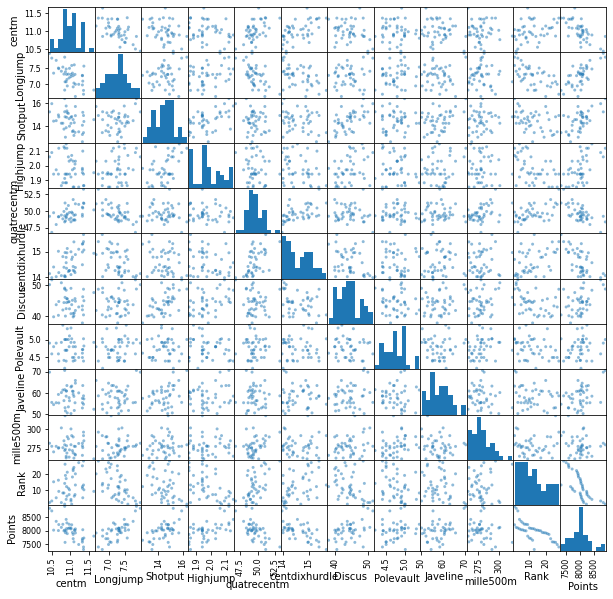

In [7]:
# réalisation d'une matrice de nuages de points pour visualiser des correlations entre les variables
pd.plotting.scatter_matrix(df, figsize=(10,10))
plt.show()
# On remarque une forte corrélation entre le score et le rank

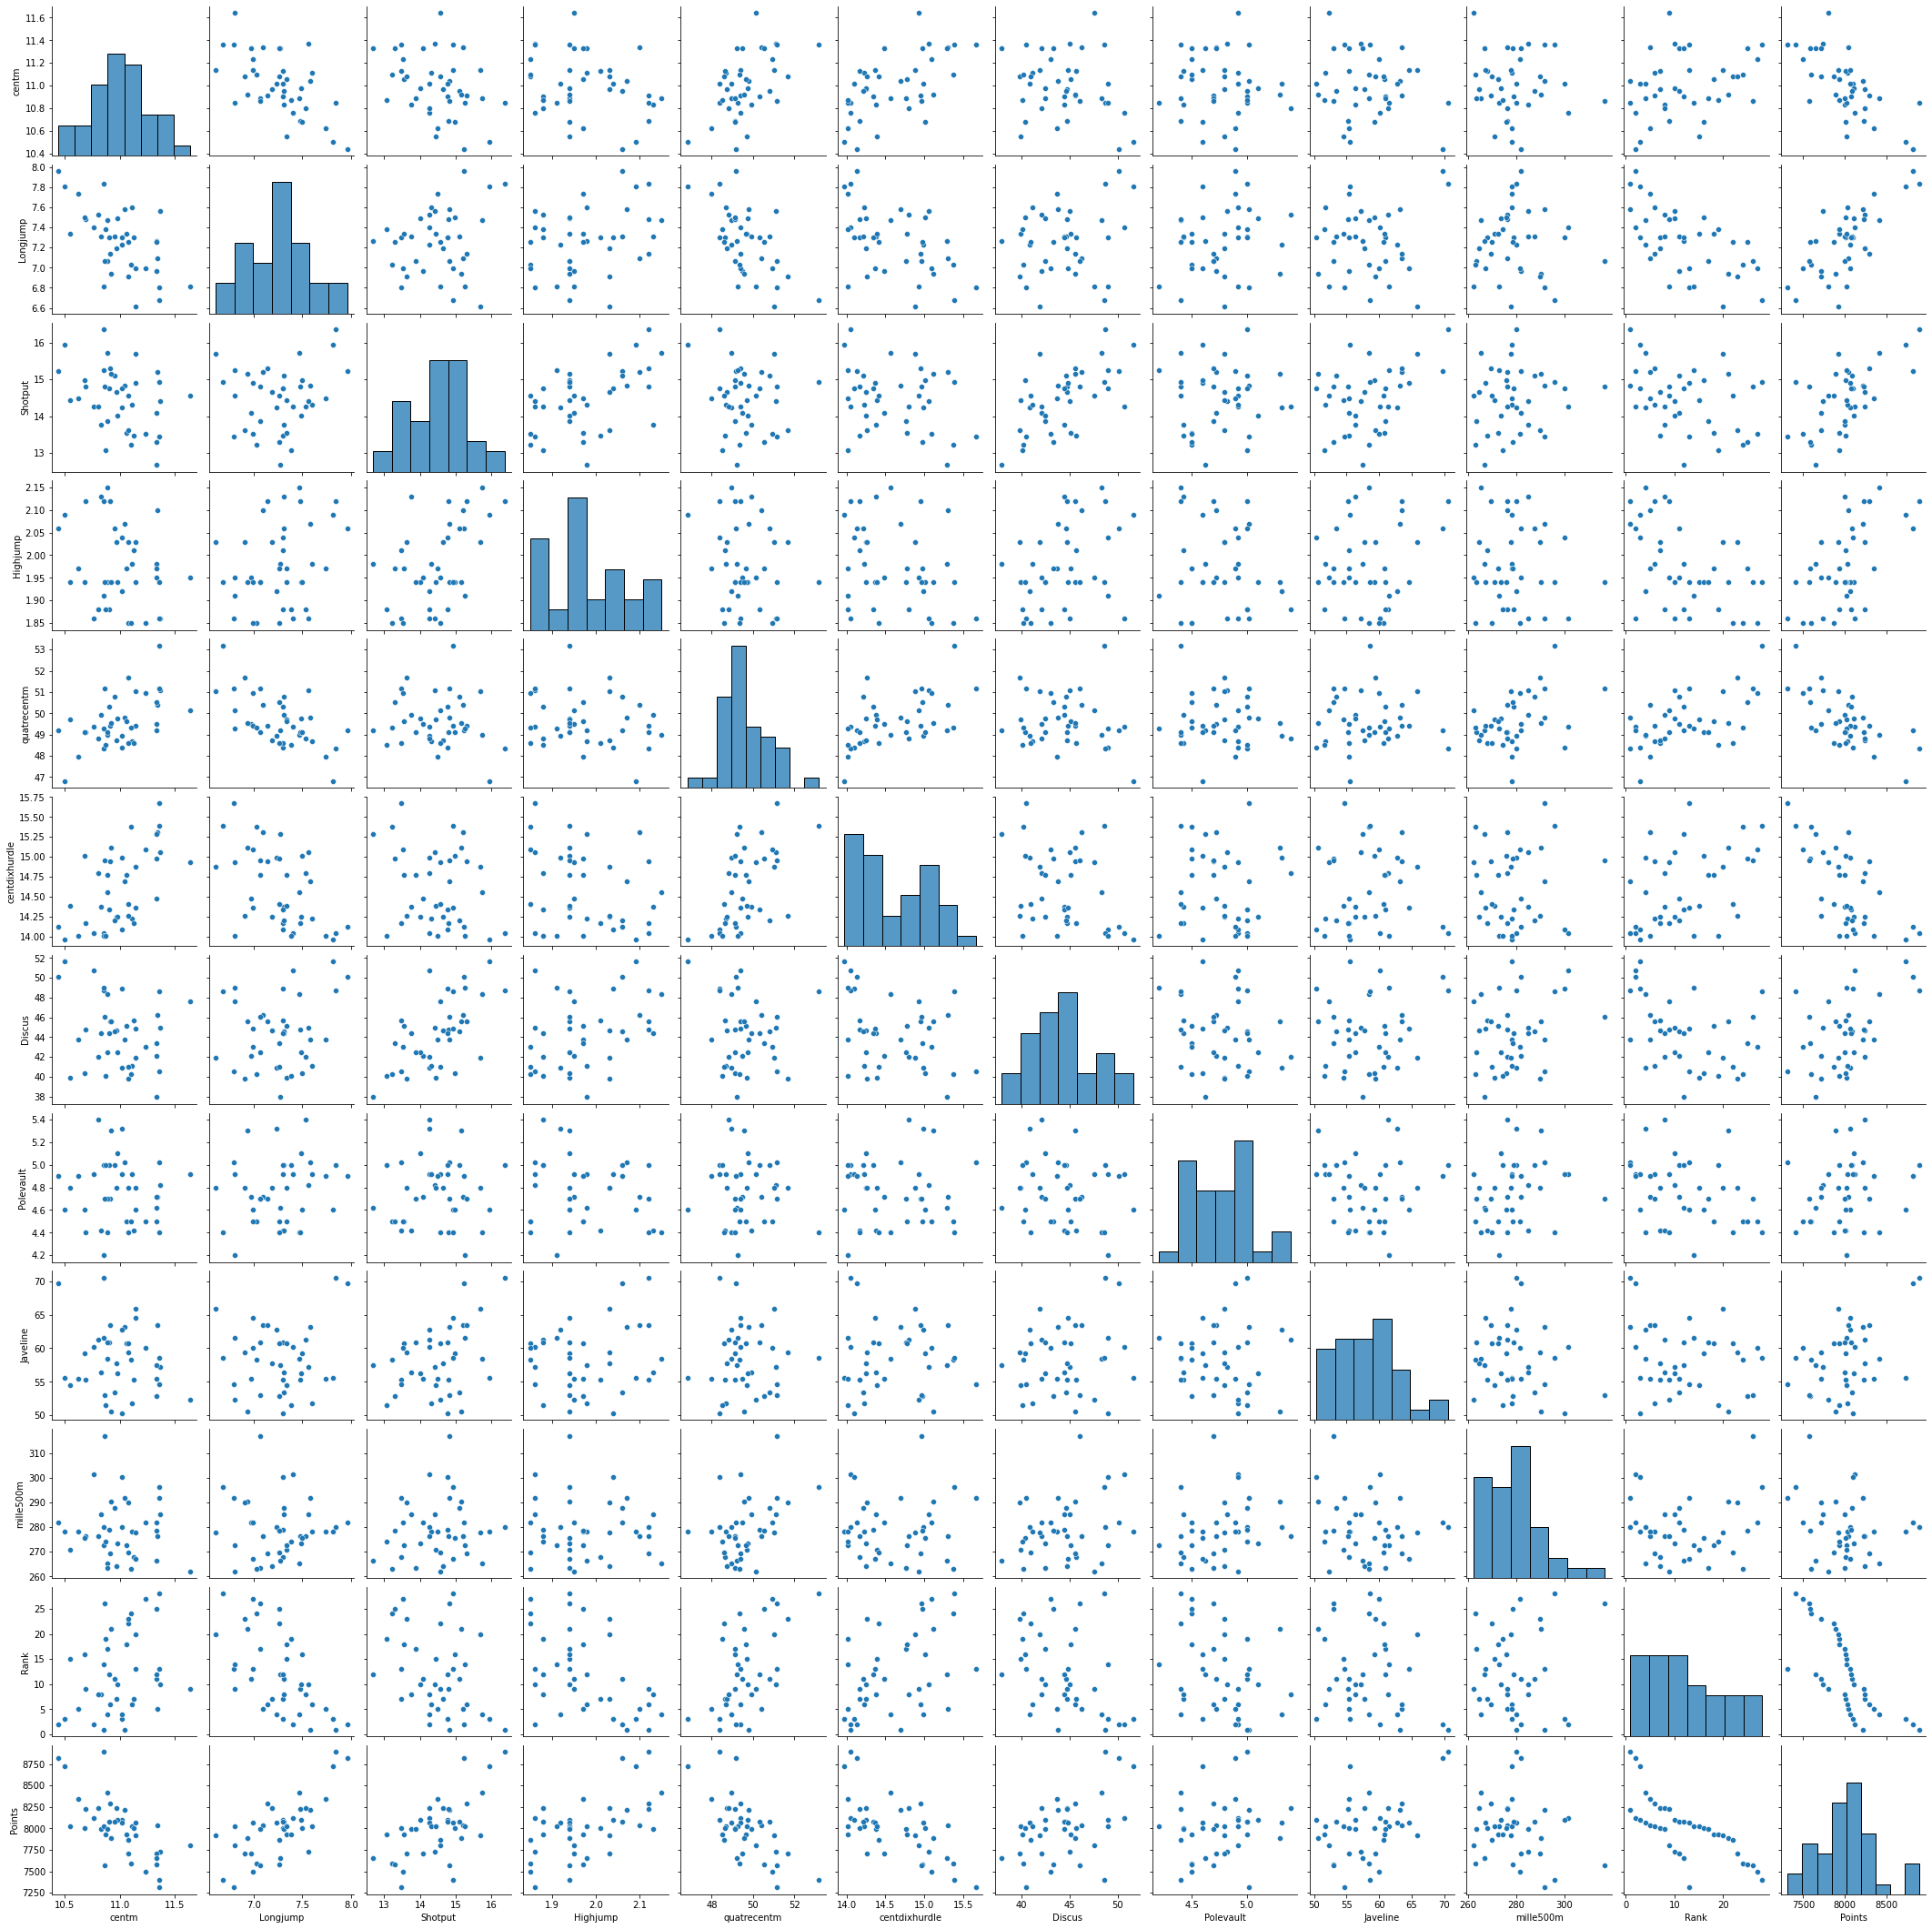

In [8]:
# Test avec seaborn
sns.pairplot(df)

<AxesSubplot:xlabel='Rank', ylabel='Points'>

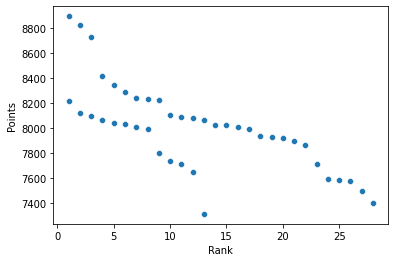

In [9]:
# nuage de points entre le rank et le score
sns.scatterplot(data=df, x="Rank", y="Points")

<AxesSubplot:xlabel='Longjump'>

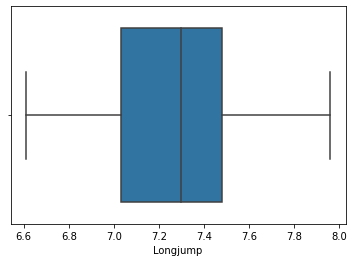

In [10]:
sns.boxplot(data=df, x="Longjump")

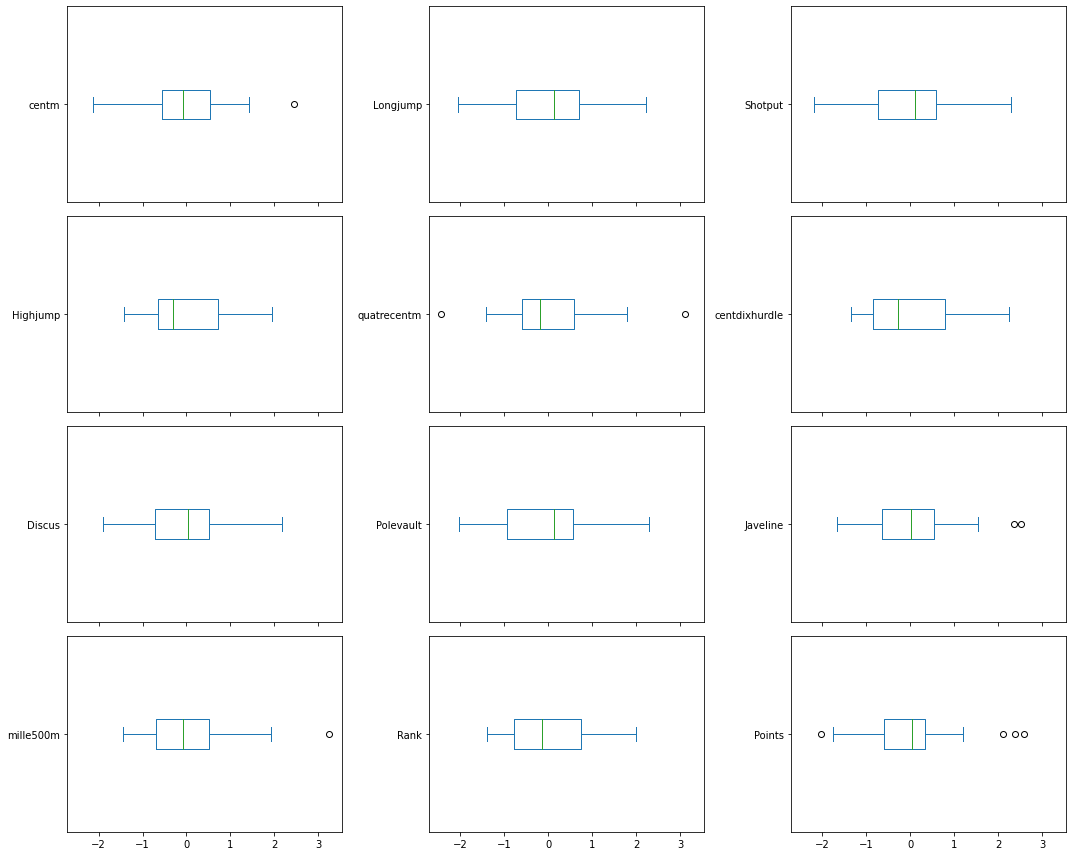

In [11]:
cols = ['centm', 'Longjump', 'Shotput', 'Highjump', 'quatrecentm',
        'centdixhurdle', 'Discus', 'Polevault', 'Javeline', 'mille500m', 'Rank',
        'Points']

df_standardized = (df[cols] - df[cols].mean()) / df[cols].std()
# Création du boxplot pour chaque colonne
df_standardized[cols].plot(kind='box', subplots=True, layout=(4,3), figsize=(15, 12), vert=False)

plt.tight_layout()
plt.show()


In [12]:
pca = PCA()
principal_components = pca.fit_transform(df_standardized)

# Variances expliquées
explained_variances = pca.explained_variance_ratio_

In [13]:
print(len(["Dim" + str(x + 1) for x in range(6)]))
print(len(pca.explained_variance_))
print(len( np.round(pca.explained_variance_ratio_ * 100)))
print(len(np.round(np.cumsum(pca.explained_variance_ratio_) * 100)))


6
12
12
12


In [14]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(12)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,4.758790,40.0,40.0
1,Dim2,1.740146,15.0,54.0
2,Dim3,1.414902,12.0,66.0
3,Dim4,1.131778,9.0,75.0
4,Dim5,0.861942,7.0,83.0
5,Dim6,0.607319,5.0,88.0
6,Dim7,0.510451,4.0,92.0
7,Dim8,0.411084,3.0,95.0
8,Dim9,0.235209,2.0,97.0
9,Dim10,0.187364,2.0,99.0


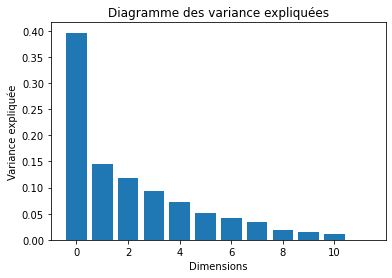

In [15]:
# Diagramme des variance expliquées
plt.bar(range(len(explained_variances)), explained_variances)
plt.xlabel('Dimensions')
plt.ylabel('Variance expliquée')
plt.title('Diagramme des variance expliquées')
plt.show()
# On remarque ici que 40% de la variance est expliquée par la première composante principale

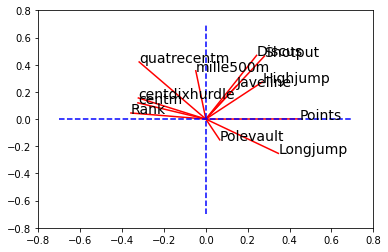

In [16]:
# Cercle de correlation
pcs = pca.components_
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='r')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, df.columns[i], fontsize='14')
# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='blue', ls='--')
# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='blue', ls='--')
# Définir les limites des axes x et y
plt.xlim([-0.8, 0.8])
plt.ylim([-0.8, 0.8])
plt.show()

In [17]:
# Nombre de composantes principales
n_components = 2
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(df_standardized)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df.head()

,PC1,PC2
0,1.486631,0.695256
1,1.538307,0.548641
2,1.580336,0.456889
3,0.081409,-0.965944
4,-0.038754,2.025558


In [18]:
WGI_pca = pca.transform(df)

In [19]:
WGI_pca_df = pd.DataFrame({
    "Dim1" : WGI_pca[:,0], 
    "Dim2" : WGI_pca[:,1],
    "Longjump" : df["Longjump"],
    "Points" : df["Points"],
})

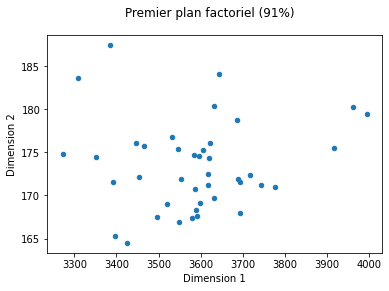

In [20]:
WGI_pca_df.plot.scatter("Dim1", "Dim2") # nuage de points
plt.xlabel("Dimension 1") # modification du nom de l'axe X
plt.ylabel("Dimension 2") # idem pour axe Y
plt.suptitle("Premier plan factoriel (91%)") # titre général
plt.show()


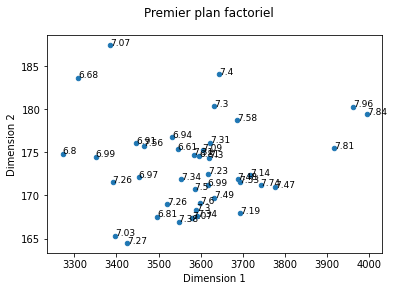

In [21]:
# utilisation de subplots nécessaire car annotation du graphique
fig, ax = plt.subplots()
WGI_pca_df.plot.scatter("Dim1", "Dim2", ax = ax) # l'option ax permet de placer les points et le texte sur le même graphique

# boucle sur chaque pays
for k in WGI_pca_df.iterrows():
    # annotation uniquement si valeur absolue sur une de 2 dimensions importantes (valeurs choisies empiriquement)
    if (abs(k[1]['Dim1']) > 3.5) | (abs(k[1]['Dim2']) > 1.5):
        ax.annotate(k[1]["Longjump"], (k[1]['Dim1'], k[1]['Dim2']), fontsize = 9)
plt.xlabel("Dimension 1") 
plt.ylabel("Dimension 2")
plt.suptitle("Premier plan factoriel")
plt.show()

In [22]:
from matplotlib import cm
# permet de créer une palette de couleurs, basée sur Color Brewer
palette = cm.get_cmap("Dark2")
# associe une couleur à chaque continent (cf ci-dessous)
couleurs = dict(zip(WGI_pca_df["Longjump"].drop_duplicates(), palette(range(6))))
couleurs

{7.58: array([0.10588235, 0.61960784, 0.46666667, 1.        ]),
 7.4: array([0.85098039, 0.37254902, 0.00784314, 1.        ]),
 7.3: array([0.45882353, 0.43921569, 0.70196078, 1.        ]),
 7.23: array([0.90588235, 0.16078431, 0.54117647, 1.        ]),
 7.09: array([0.4       , 0.65098039, 0.11764706, 1.        ]),
 7.6: array([0.90196078, 0.67058824, 0.00784314, 1.        ])}

In [23]:
couleurs[7.4]

array([0.85098039, 0.37254902, 0.00784314, 1.        ])

In [24]:
position = dict(zip(couleurs.keys(), range(6)))
position

{7.58: 0, 7.4: 1, 7.3: 2, 7.23: 3, 7.09: 4, 7.6: 5}

In [25]:
# Affichage des points avec une liste de couleurs
WGI_pca_df.plot.scatter(x = "Dim1", y = "Dim2", c = [couleurs[p] for p in WGI_pca_df["Points"]])
# boucle pour afficher la légende
for cont, coul in couleurs.items():
    plt.scatter(3, position[cont] / 3 + 2.15, c = [coul], s = 20)
    plt.text(3.2, position[cont] / 3 + 2, cont)
plt.xlabel("Dimension 1") 
plt.ylabel("Dimension 2")
plt.suptitle("Premier plan factoriel")
plt.show()

KeyError: 8217